In [ ]:
!pip install -U numpy pandas sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Monta os arquivos do google drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
base_dir = Path('/content/drive/My Drive/TCC/')
base_dir.cwd()

Mounted at /content/drive/


PosixPath('/content')

In [ ]:
csv_path = base_dir / 'lsb_10_features_label.csv'
df_data = pd.read_csv(csv_path, names=['filename', 'average distance', 'l2 distance', 'structure content', 'image fidelity', 'n cross correlation', 'nmse', 'psnr', 'label'])
print(df_data.shape)
del df_data['filename']
df_data

(5150, 9)


,average distance,l2 distance,structure content,image fidelity,n cross correlation,nmse,psnr,label
0,119.697372,1.145089,1.010934,0.480688,1.115544,0.513696,26.951053,0
1,119.974518,1.148894,1.004352,0.483421,1.114118,0.514340,28.067194,0
2,109.278524,1.112607,1.006842,0.743163,1.080331,0.255092,32.428090,0
3,116.632884,1.150415,1.001973,0.792410,1.148525,0.207181,33.634536,0
4,106.109268,1.099780,1.001852,0.849121,1.153492,0.150600,34.017006,0
...,...,...,...,...,...,...,...,...
5145,118.956390,1.149512,1.013455,0.567359,1.115155,0.426897,29.380865,1
5146,122.700317,1.158981,0.998393,0.424149,1.188407,0.576778,27.205641,1
5147,119.314596,1.134298,1.011017,0.324599,1.121567,0.668041,25.620702,1
5148,120.503713,1.154130,1.006372,0.507236,1.167352,0.489644,28.530027,1


In [ ]:
arr = df_data.to_numpy()
X = arr[:, :7]
y = arr[:, 7]

print(X)

[[119.69737244   1.14508921   1.01093384 ...   1.11554369   0.51369572
   26.95105255]
 [119.97451782   1.14889396   1.00435201 ...   1.11411794   0.51434025
   28.06719403]
 [109.27852376   1.11260708   1.00684192 ...   1.08033108   0.25509194
   32.42808967]
 ...
 [119.31459554   1.13429762   1.01101699 ...   1.12156672   0.66804134
   25.62070204]
 [120.50371297   1.15413      1.00637185 ...   1.16735229   0.48964373
   28.53002686]
 [122.03621419   1.15864258   0.99890847 ...   1.1753001    0.55367495
   28.13388396]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X_train.dtype)
#print(y_train.dtype)
#clf = svm.SVC()
clf = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='rbf', gamma='scale'))
#clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#score = clf.score(X_train, y_train)
#print(score)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
res = confusion_matrix(y_test, predictions)
percentage = clf.score(X_test, y_test)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[421 341]
 [380 403]]
Test Set: 1545
Accuracy = 53.333333333333336 %


In [ ]:
def xxplot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

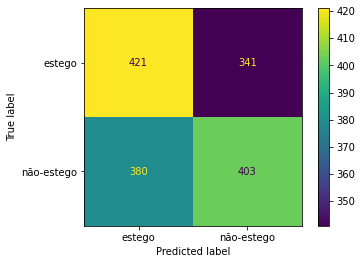

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=["estego", "não-estego"])